In [1]:
# Let's load pandas and see the first few rows of the dataset for COVID-19 project.
import pandas as pd
import os
import sys
covid = pd.read_csv('https://raw.githubusercontent.com/bradley1958/DATA695/master/BRAD_DATA695_COVID_DATASET_REVISED.csv')
covid.head()



,Patient Identificator,"Gender: \n""0"" - Female; \n""1"" - Male",Gender,"Age, years","Age >60 years: \nYes - ""1"", \nNo - ""0""","SARS-CoV-2 RT-PCR testing results: \nPositive - ""1""\nNegative - ""0""",CoVid-19 Test,Time between the disease onset and admission to the hospital (days),Time between admission to the hospital and transfer to ICU (days),Less Than 72 Hours to ICU Transfer,CRP upon admission (mg/L),Abnormal CRP,INR upon admission,Abnormal INR,PT upon admission (sec.),Abnormal PT,Fibrinogen upon admission (mg/L),Abnormal Fibrinogen,Chest CT upon admission: lung tissue affected (%),"Artificial lung ventilation in ICU:\nYes - ""1"", \nNo - ""0""",Age Greater Than 60,Ventilation Required,Lung Obstruction Greater than 25%,Platelet count upon admission (10^9/L),Platelet Count Abnormal,"Chest CT, 1 week after admission: lung tissue affected (%)","CRP, 1 week after admission (mg/L)","Platelet count, 1 week after admission (10^9/L)","Cough: Yes - ""1"" No - ""0""",Cough,"Diarrhea: Yes - ""1"" No - ""0""",Diarrhea,"Dyspnea (Labored Breathing) Yes - ""1"" No - ""0""",Labored Breathing,"Smoke: Yes - ""1"" No - ""0""",Smoker,"Oxygen Saturation Level < 88: Yes - ""1"" No - ""0""",Oxygen Level Below 88%,"Body Temp Greater than 104 Yes - ""1"" No - ""0""",Temp Greater Than 104,"Patient is Obese: Yes - ""1"" No - ""0""",Obese
0,P1,1,Male,70,1,1,Positive,7,0,Yes,112,Yes,1.10,No,12.00,No,5.46,Yes,40,0,Yes,No,Yes,161,No,7,28,407,1,Yes,0,No,0,No,0,No,0,No,0,No,0,No
1,P2,1,Male,46,0,1,Positive,10,0,Yes,72,Yes,1.39,Yes,15.10,Yes,5.00,Yes,35,1,No,Yes,Yes,306,No,12,28,431,0,No,0,No,0,No,0,No,0,Yes,0,No,0,No
2,P3,1,Male,94,1,1,Positive,3,0,Yes,84,Yes,1.08,No,11.80,No,2.98,No,75,1,Yes,Yes,Yes,199,No,20,25,251,0,No,0,No,0,No,0,No,1,Yes,0,No,0,No
3,P4,1,Male,74,1,1,Positive,11,0,Yes,69,Yes,1.27,No,13.94,Yes,4.94,Yes,40,1,Yes,Yes,Yes,97,Yes,90,44,316,1,Yes,0,No,1,Yes,1,Yes,1,Yes,1,Yes,1,Yes
4,P5,1,Male,53,0,1,Positive,8,0,Yes,135,Yes,1.43,No,15.50,Yes,6.87,Yes,40,1,Yes,Yes,Yes,302,No,36,65,308,0,No,0,No,1,Yes,1,Yes,1,Yes,1,Yes,1,Yes


Next, let's look at the structure of our COVID Dataset.


In [2]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 42 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Patient Identificator                                                350 non-null    object 
 1   Gender: 
"0" - Female; 
"1" - Male                                   350 non-null    int64  
 2   Gender                                                               350 non-null    object 
 3   Age, years                                                           350 non-null    int64  
 4   Age >60 years: 
Yes - "1", 
No - "0"                                 350 non-null    int64  
 5   SARS-CoV-2 RT-PCR testing results: 
Positive - "1"
Negative - "0"    350 non-null    int64  
 6   CoVid-19 Test                                                        350 non-null    object 
 7   Time bet

We see above that we have a dataset with 350 records by 42 columns. The dtypes are "float64" at 3, "int64" at 20, and "object" at 19. We also see that we have no "null" values to deal with. If we had missing values I would have taken the median value for each column heading containing "null' values and subsituted that column's median value for missing data points within a specific column. Next, let's pull some discriptive statistics about our data points.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.image as mpimg
import numpy as np
from sklearn import metrics
covid.describe()

,"Gender: \n""0"" - Female; \n""1"" - Male","Age, years","Age >60 years: \nYes - ""1"", \nNo - ""0""","SARS-CoV-2 RT-PCR testing results: \nPositive - ""1""\nNegative - ""0""",Time between the disease onset and admission to the hospital (days),Time between admission to the hospital and transfer to ICU (days),CRP upon admission (mg/L),INR upon admission,PT upon admission (sec.),Fibrinogen upon admission (mg/L),Chest CT upon admission: lung tissue affected (%),"Artificial lung ventilation in ICU:\nYes - ""1"", \nNo - ""0""",Platelet count upon admission (10^9/L),"Chest CT, 1 week after admission: lung tissue affected (%)","CRP, 1 week after admission (mg/L)","Platelet count, 1 week after admission (10^9/L)","Cough: Yes - ""1"" No - ""0""","Diarrhea: Yes - ""1"" No - ""0""","Dyspnea (Labored Breathing) Yes - ""1"" No - ""0""","Smoke: Yes - ""1"" No - ""0""","Oxygen Saturation Level < 88: Yes - ""1"" No - ""0""","Body Temp Greater than 104 Yes - ""1"" No - ""0""","Patient is Obese: Yes - ""1"" No - ""0"""
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,0.577143,57.805714,0.460000,0.677143,8.728571,2.445714,95.091429,1.274714,13.908171,4.897000,51.280000,0.645714,181.397143,35.737143,63.942857,272.785714,0.611429,0.222857,0.688571,0.688571,0.848571,0.688571,0.691429
std,0.494720,15.113779,0.499111,0.468238,6.886558,2.898705,65.601451,0.151545,1.653061,1.133649,15.765342,0.478981,72.373272,31.389859,53.396362,91.994720,0.488123,0.416759,0.463741,0.463741,0.358979,0.463741,0.462565
min,0.000000,20.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.980000,10.700000,1.240000,10.000000,0.000000,38.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,47.000000,0.000000,0.000000,5.000000,0.000000,36.000000,1.180000,12.900000,4.332500,40.000000,0.000000,134.500000,7.000000,36.000000,231.250000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,58.500000,0.000000,1.000000,7.000000,1.000000,86.500000,1.260000,13.750000,4.940000,52.000000,1.000000,169.000000,36.000000,56.000000,275.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,69.000000,1.000000,1.000000,10.000000,4.000000,155.000000,1.340000,14.500000,5.200000,60.000000,1.000000,217.500000,58.750000,65.000000,327.500000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,94.000000,1.000000,1.000000,50.000000,14.000000,328.000000,1.920000,20.600000,11.480000,92.000000,1.000000,493.000000,100.000000,323.000000,547.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From our discriptive statistics we are focused on the following column heads "Age, years", "Time to Hospital Admission", "Time to ICU Transfer", "CRP upon Admission", INR upon Admission", "PT upon Admission", "Fibrinogen upon Admission", "Percent Lung Tissue Affected", "Platelet Count upon Admission". Let's see if we can take a sub-set and break-out that information for a focused view.


In [4]:
subset_covid = pd.read_csv('https://raw.githubusercontent.com/bradley1958/DATA695/master/BRAD_DATA695_COVID_SUBSET_REVISED.csv')
subset_covid.head(5)

,Patient Identificator,Gender,"Age, years",CoVid-19 Test,Time between the disease onset and admission to the hospital (days),Time between admission to the hospital and transfer to ICU (days),CRP upon admission (mg/L),INR upon admission,PT upon admission (sec.),Fibrinogen upon admission (mg/L),Chest CT upon admission: lung tissue affected (%),Platelet count upon admission (10^9/L)
0,P1,Male,70,Positive,7,0,112,1.10,12.00,5.46,40,161
1,P2,Male,46,Positive,10,0,72,1.39,15.10,5.00,35,306
2,P3,Male,94,Positive,3,0,84,1.08,11.80,2.98,75,199
3,P4,Male,74,Positive,11,0,69,1.27,13.94,4.94,40,97
4,P5,Male,53,Positive,8,0,135,1.43,15.50,6.87,40,302


In [5]:
subset_covid.describe()

,"Age, years",Time between the disease onset and admission to the hospital (days),Time between admission to the hospital and transfer to ICU (days),CRP upon admission (mg/L),INR upon admission,PT upon admission (sec.),Fibrinogen upon admission (mg/L),Chest CT upon admission: lung tissue affected (%),Platelet count upon admission (10^9/L)
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,57.805714,8.728571,2.445714,95.091429,1.274714,13.908171,4.897000,51.280000,181.397143
std,15.113779,6.886558,2.898705,65.601451,0.151545,1.653061,1.133649,15.765342,72.373272
min,20.000000,1.000000,0.000000,1.000000,0.980000,10.700000,1.240000,10.000000,38.000000
25%,47.000000,5.000000,0.000000,36.000000,1.180000,12.900000,4.332500,40.000000,134.500000
50%,58.500000,7.000000,1.000000,86.500000,1.260000,13.750000,4.940000,52.000000,169.000000
75%,69.000000,10.000000,4.000000,155.000000,1.340000,14.500000,5.200000,60.000000,217.500000
max,94.000000,50.000000,14.000000,328.000000,1.920000,20.600000,11.480000,92.000000,493.000000


Here is the breakout of our discriptive statistics on numeric data features:

**Age**

Min - 20 Yrs

Max - 94 Yrs

Mean - Nearly 58 Yrs

**Time to Admission to Hospital**

Min - 1 Day

Max - 50 Days

Mean - Nearly 9 Days

**CRP Upon Admission**

Min - 1.0

Max - 328.0

Mean - 95.0

**Noraml Value:  Less Than 10**

**INR Upon Admission**

Min - 0.98

Max - 1.92

Mean - 1,27

**Normal Value: 1.1 or Below**

**PT Upon Admission**

Min - 10.7

Max - 20.6

Mean - 13.9

**Normal Range:  11 to 12.5 Seconds for Clotting**

Fibrinogen Upon Admission

Min - 1.24

MAx - 11.28

Mean - 4.89

**Normal Range: 2.0 to 4.0**

**Percentage of Lung Tissue Affected**

Min - 10%

Max - 92%

Mean - 51.28%

**Platelet Count**

Min - 38

Max - 493

Mean - 181.35

**Noraml Range:  150 to 450**




Next, let's see if we can do a Correlation Matrix on our two datasets.

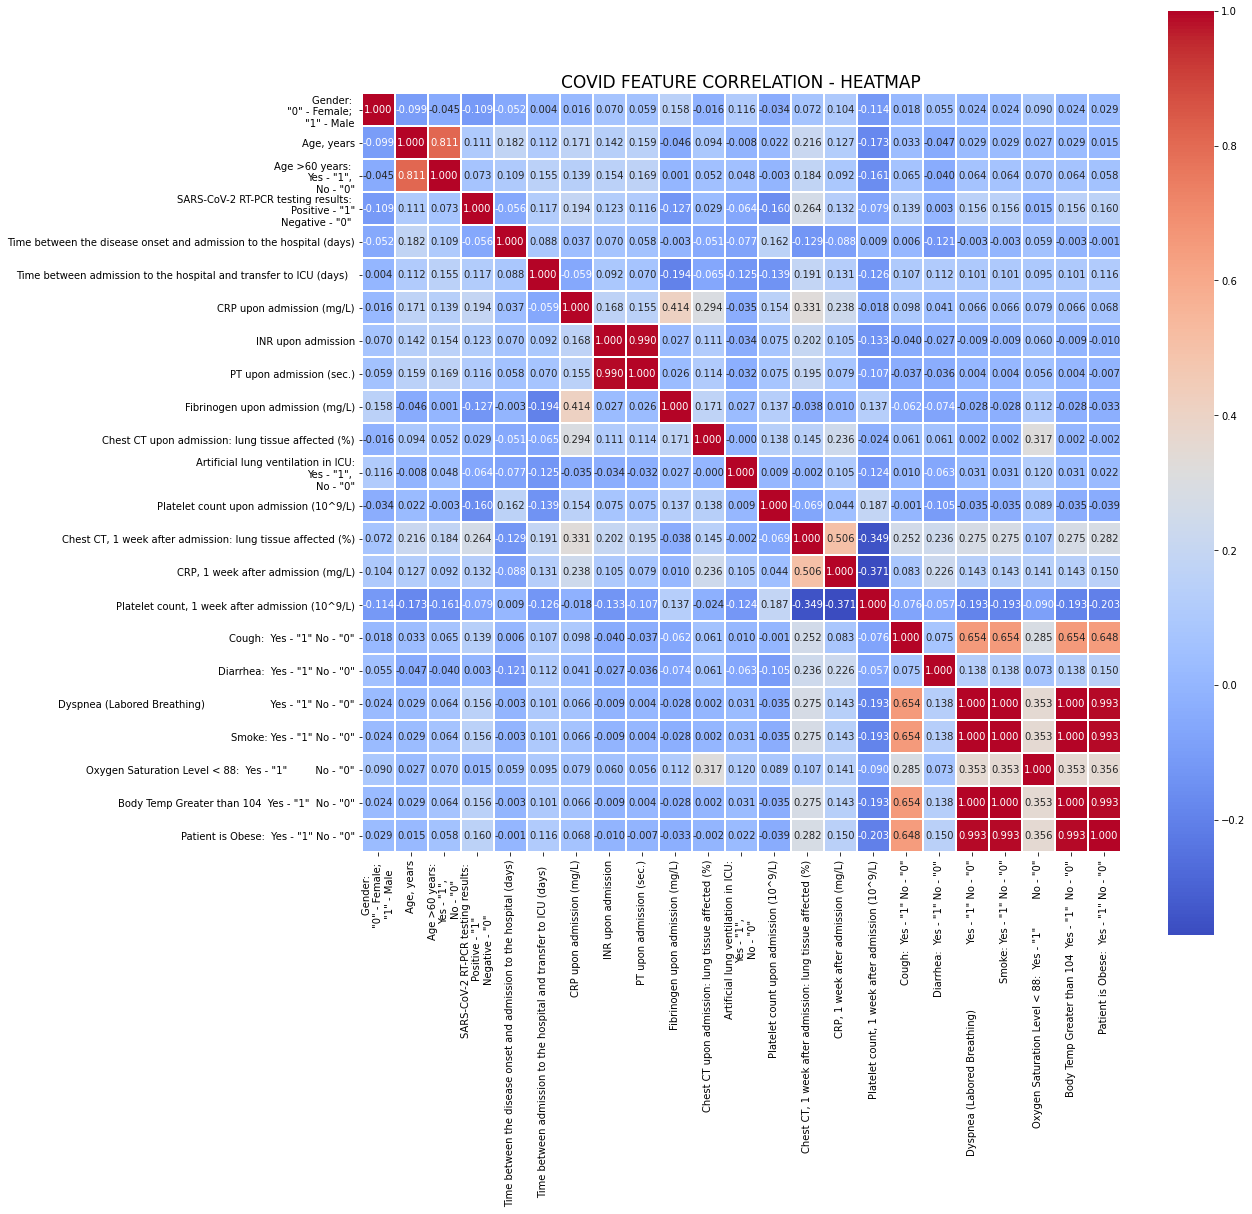

In [6]:
# Correlation Matrix on the "covid" Dataset
corr = covid.corr()
f, ax = plt.subplots(figsize=(17, 17))
sns.heatmap(corr, square=True, cbar=True, annot=True, fmt='.3f',
            xticklabels=True, yticklabels=True,
            cmap="coolwarm", linewidth=1, ax=ax)
plt.title('COVID FEATURE CORRELATION - HEATMAP', size=17);

So, what does this heatmap have to say about our data? We can see that Labored Breathing, Coughing, Temp above 104, Obesity, Smoking, and Age over 60 Yrs all play a significant role in the possibility of an indivdual requiring ICU transfer and ventilation.  Secondary consideration is the percentage of Lung Tissue affected along with related blood abnormalities. 

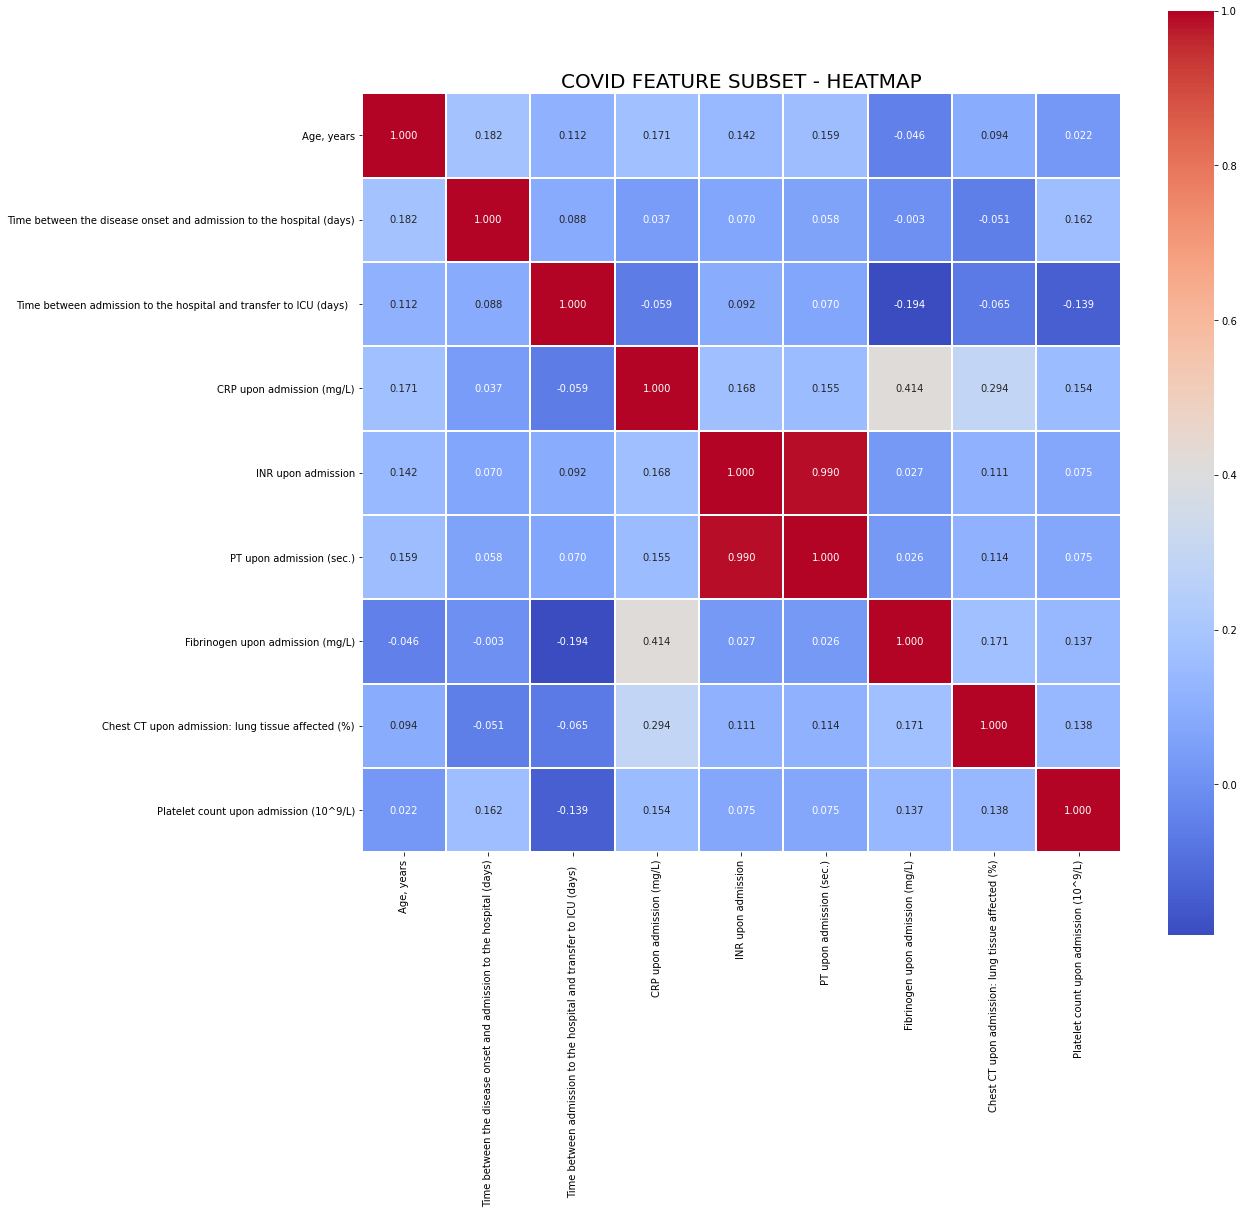

In [11]:
corr = subset_covid.corr()
f, ax = plt.subplots(figsize=(17, 17))
sns.heatmap(corr, square=True, cbar=True, annot=True, fmt='.3f',
            xticklabels=True, yticklabels=True,
            cmap="coolwarm", linewidth=1, ax=ax)
plt.title('COVID FEATURE SUBSET - HEATMAP', size=20);

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


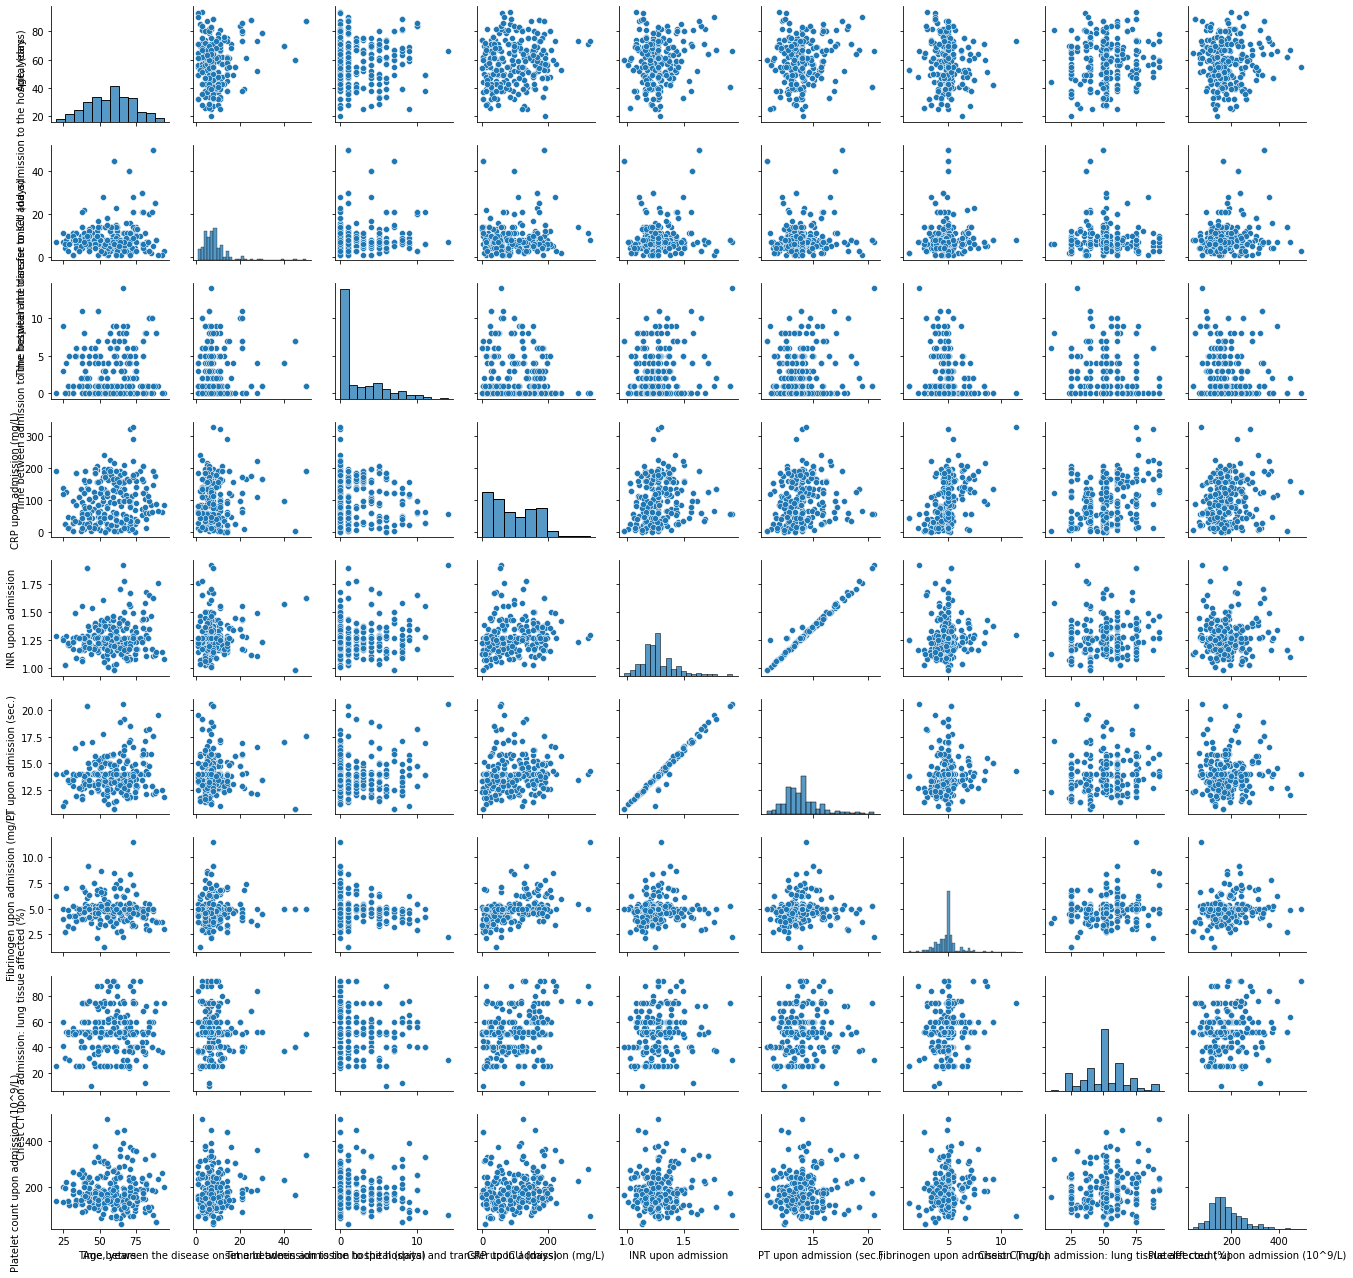

In [12]:
sns.pairplot(subset_covid)